# Task C : Group your Audience
It is the subdivision of a market into discrete customer groups that share similar characteristics and can be a powerful means to identify unsatisfied customer needs. Using this data companies can then outperform the competition by developing uniquely appealing products and services.
The most common ways in which businesses segment their customer base are:
1.	Demographic information, such as gender, age, familial and marital status, income, education, and occupation.
2.	Geographical information, which differs depending on the scope of the company. For localized businesses, this info might pertain to specific towns or counties. For larger companies, it might mean a customer’s city, state, or even country of residence.
3.	Psychographics, such as social class, lifestyle, and personality traits.
4.	Behavioral data, such as spending and consumption habits, product/service usage, and desired benefits.

In this project, features such as gender, age, annual income and spending score were used to segment customers into common clusters. K-means clustering algorithm was used for the task.


# Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load Data

In [74]:
df = pd.read_csv("customer_data.csv")

The dataset contains 200 rows and 4 columns.The columns in the dataset are CustomerId,Gender,Age,Annual Income and Spending score.

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [76]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [77]:
# First 5 rows of our data
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [78]:
#Removing the CustomerId column as it doesnt add any relevance to the task
df.drop(["CustomerID"], axis = 1, inplace=True)

The Gender values are categorical in nature. To use of it in the process we have to convert it into numerical values.For this,two dummy columns are created for each Male and Female genders with values 0 and 1 accordingly.These dummy columns are then concatenated with the original Dataset.

In [79]:
#converting the categorical gender values to numerical values
df_gender = pd.get_dummies(df.Gender)
df = pd.concat([df,df_gender],axis=1)

In [80]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,Male,19,15,39,0,1
1,Male,21,15,81,0,1
2,Female,20,16,6,1,0
3,Female,23,16,77,1,0
4,Female,31,17,40,1,0


# Data Visualization 

# 1: Violin Plot
Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator.
Violin plot of age data is plotted.

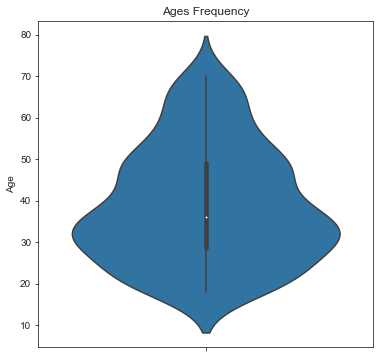

In [81]:
#plotting a violin_plot of age data to visualize the age frequency distribution
plt.figure(figsize=(6,6))
plt.title("Ages Frequency")
sns.axes_style("whitegrid")
sns.violinplot(y=df["Age"])
plt.show()

We can observe that most customers engaging with our business are between 25-50 years old.

# 2: Box Plot
A box plot is a type of chart often used in explanatory data analysis to visually show the distribution of numerical data and skewness through displaying the data quartiles (or percentiles) and averages.

Box plots show the five-number summary of a set of data: including the minimum score, first (lower) quartile, median, third (upper) quartile, and maximum score.
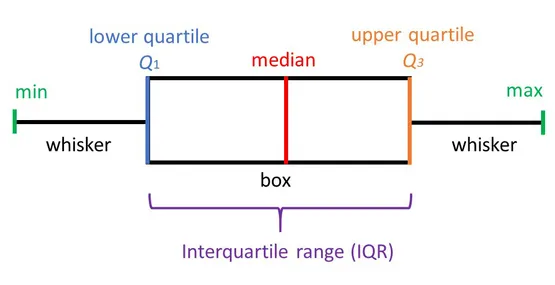

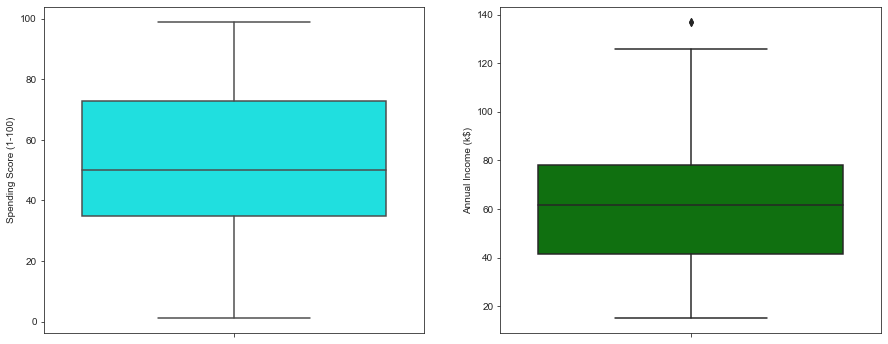

In [82]:
#plotting boxplot for spending_score and annual_income to better visualize their distribution ranges
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=df["Spending Score (1-100)"], color="cyan")
plt.subplot(1,2,2)
sns.boxplot(y=df["Annual Income (k$)"], color="green")
plt.show()

We can observe in the boxplot above that the range of spending score of the customers is more than their annual income range.

# 3: Barplot
A barplot (or barchart) is one of the most common type of plot. It shows the relationship between a numerical variable and a categorical variable.


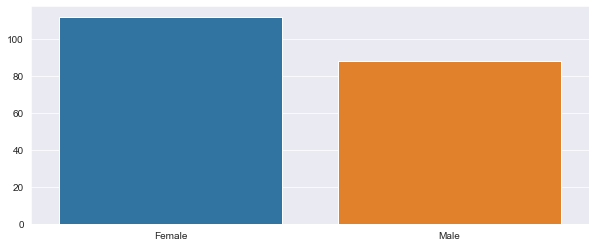

In [83]:
#plotting barplot to compare number of female customers to male customers
genders = df.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

It is seen below that the female population clearly outweighs the male counterpart.

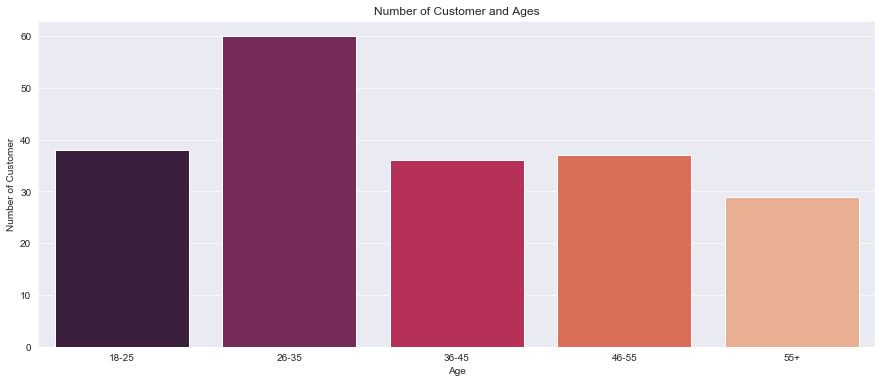

In [84]:
#plotting barplot to check the distribution of number of customers in each age group
age_bet_18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age_bet_26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age_bet_36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age_bet_46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age_bet_18_25.values),len(age_bet_26_35.values),len(age_bet_36_45.values),len(age_bet_46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

Next a bar plot to check the distribution of number of customers in each age group was plotted. Clearly the 26–35 age group outweighs every other age group.

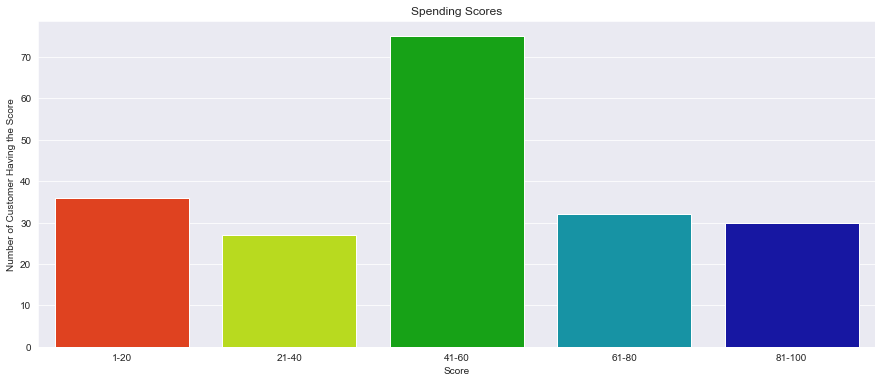

In [85]:
#plotting barplot to visualize the number of customers according to their spending scores
ss_bet_1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss_bet_21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss_bet_41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss_bet_61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss_bet_81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss_bet_1_20.values), len(ss_bet_21_40.values), len(ss_bet_41_60.values), len(ss_bet_61_80.values), len(ss_bet_81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

I continued with making a bar plot to visualize the number of customers according to their spending scores. The majority of the customers have spending score in the range 41–60.

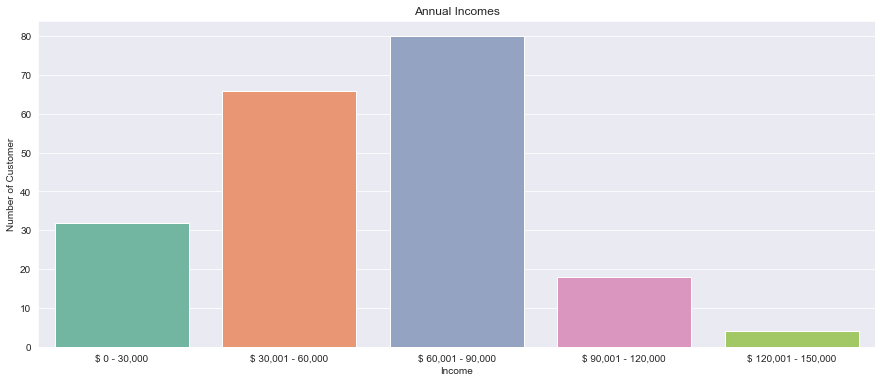

In [86]:
#plotting barplot to visualize the number of customers according to their annual income
ai_bet_0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai_bet_31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai_bet_61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai_bet_91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai_bet_121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai_bet_0_30.values), len(ai_bet_31_60.values), len(ai_bet_61_90.values), len(ai_bet_91_120.values), len(ai_bet_121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

Also a bar plot to visualize the number of customers according to their annual income was plotted. It was found that the majority of the customers have annual income in the range 60000 and 90000.

# Scatterplot

A scatter plot is a type of plot or mathematical diagram using Cartesian coordinates to display values for a set of data.The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis.

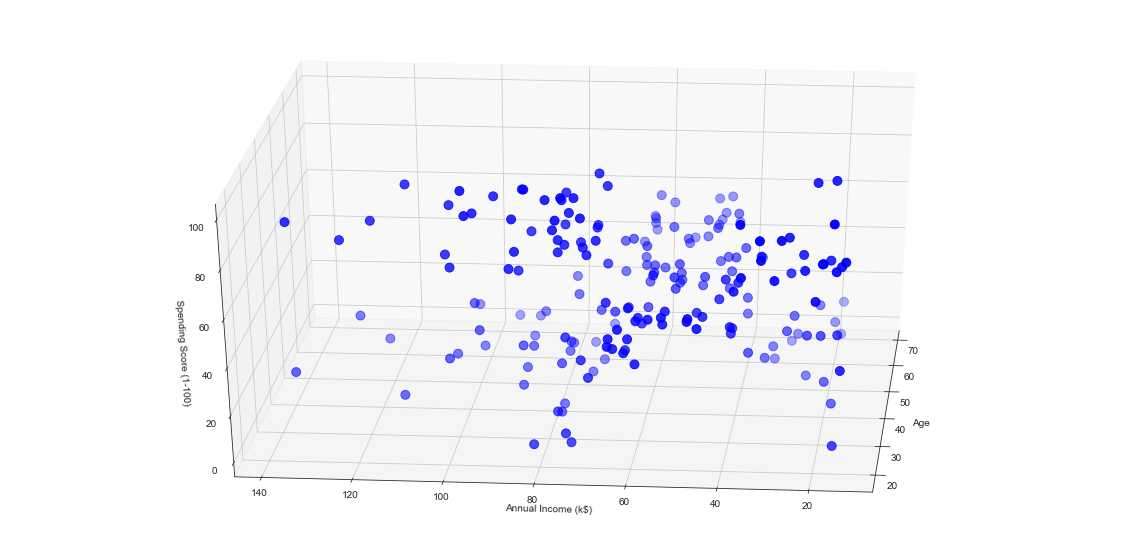

In [87]:
#plotting scatterplot between annual_income,age and spending_score
from mpl_toolkits.mplot3d import Axes3D

sns.set_style("ticks")
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age, df["Annual Income (k$)"], df["Spending Score (1-100)"], c='blue', s=80)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()


A 3D scatterplot between the spending scores,annual income and age of customers was created to visualize their distribution.

# The Elbow Method
Next a plot between Within Cluster Sum Of Squares (WCSS) against the the number of clusters (K Value) was created to figure out the optimal number of clusters value. WCSS measures sum of distances of observations from their cluster centroids which is given by the below formula.
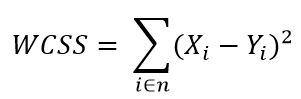
where Yi is centroid for observation Xi. The main goal is to maximize number of clusters and in limiting case each data point becomes its own cluster centroid.

The Within Cluster Sum of Squared Errors (WCSS) for different values of k are calculated and the k for which WSS first starts to diminish is chosen. In the plot of WSS-versus k, this is visible as an elbow.

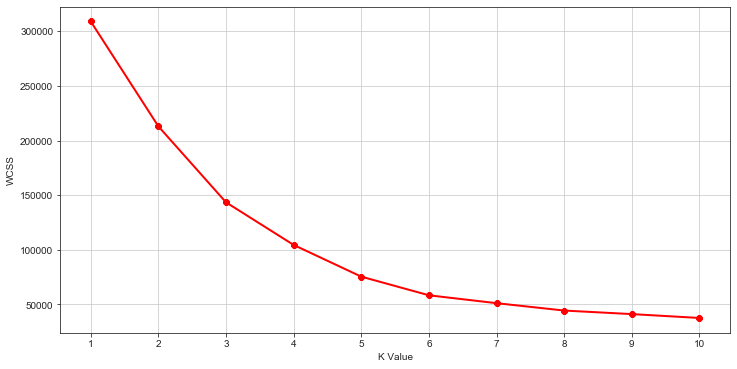

In [88]:
#plotting within_cluster_sum_of_squares(wcss) against the the no_of_clusters(K Value) to figure out the optimal K value
from sklearn.cluster import KMeans

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters.The optimal K value is found to be 5 using the elbow method.

# K Means Clustering algorithm
K means clustering is one of the most popular clustering algorithms and usually the first thing practitioners apply when solving clustering tasks to get an idea of the structure of the dataset. The goal of K means is to group data points into distinct non-overlapping subgroups. One of the major application of K means clustering is segmentation of customers to get a better understanding of them which in turn could be used to increase the revenue of the company.K-means clustering minimizes within-cluster variances or the squared Euclidean distances.

Steps involved in the algorithm are:
1.	The number of clusters K is specified.
2.	Centroids are initialized by first shuffling the dataset and then randomly selecting K data points for the centroids without replacement.
3.	We have to keep iterating until there is no change to the centroids. i.e assignment of data points to clusters isn’t changing.


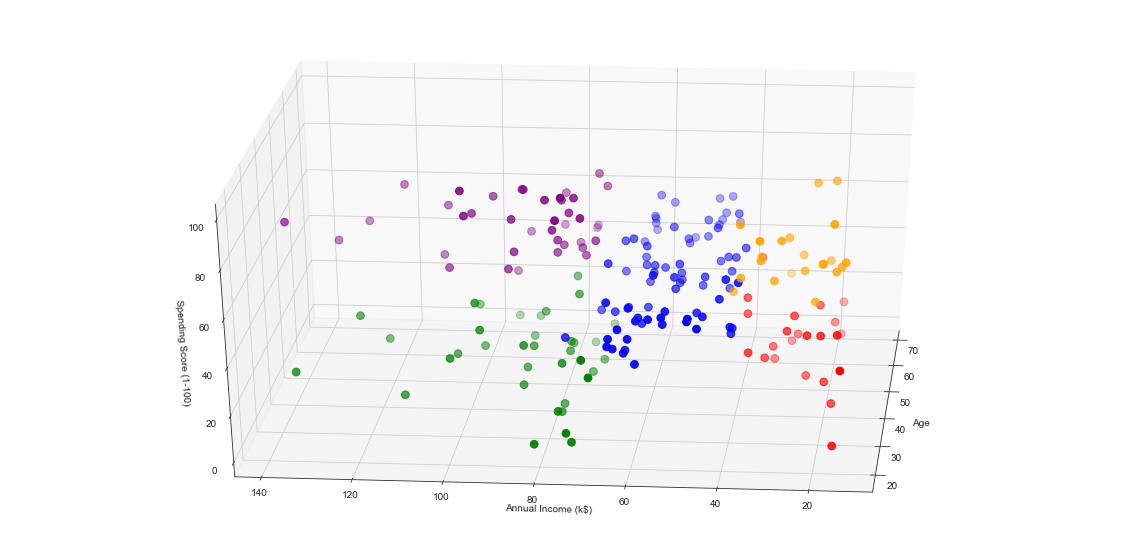

In [89]:
#3D plot to visualize clusters of customers with similar characteristics
km = KMeans(n_clusters=5)
clusters = km.fit_predict(df.iloc[:,1:])

df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

# Result
Finally a 3D plot is made to visualize the spending score of the customers with their annual income. The data points are separated into 5 classes which are represented in different colours as shown in the 3D plot. We can clearly observe formation of 5 different clusters of customers based on their spending scores,annual income and age.We can now easily target groups customers based on the above characteristics and thus increase their engagement with our organisation.